(c_features)=

# Feature Representation  

## Vector vs. Raster

To work in a GIS environment, real world observations (objects or events that can be recorded in 2D or 3D space) need to be reduced to spatial entities. These spatial entities can be represented in a GIS as a **vector data model** or a **raster data model**. 

```{figure} ../_static/img/vector_vs_raster.jpg
:name: raster vs vector
Vector and raster representations of a river feature. 
```

### Vector

Vector features can be decomposed into three different geometric primitives: **points**, **polylines** and **polygons**.

#### Point

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

d = {'name': ['Washington\n(38.90, -77.03)', 'Baltimore\n(39.29, -76.61)','Fredrick\n(39.41,-77.40)'], 
     'geometry': [Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)]}

gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
print(gdf)

                          name                    geometry
0  Washington\n(38.90, -77.03)  POINT (-77.03687 38.90719)
1   Baltimore\n(39.29, -76.61)  POINT (-76.61219 39.29039)
2     Fredrick\n(39.41,-77.40)  POINT (-77.40846 39.41201)


A point is composed of one coordinate pair representing a specific location in a coordinate system. Points are the most basic geometric primitives having no length or area. By definition a point can't be “seen” since it has no area; but this is not practical if such primitives are to be mapped. So points on a map are represented using *symbols* that have both area and shape (e.g. circle, square, plus signs).

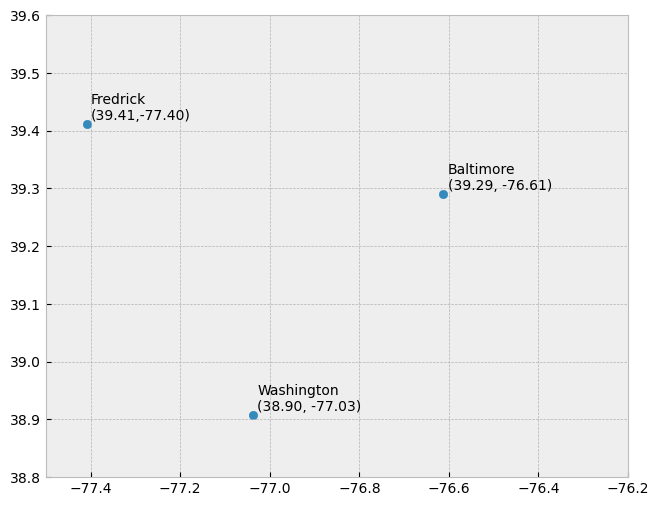

In [2]:
plt.style.use('bmh') # better for plotting geometries vs general plots.

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.ylim([38.8, 39.6])
plt.xlim([-77.5, -76.2])

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.show()

We seem capable of interpreting such symbols as points, but there may be instances when such interpretation may be ambiguous (e.g. is a round symbol delineating the area of a round feature on the ground such as a large oil storage tank or is it representing the point location of that tank?).

#### Polyline

<Axes: >

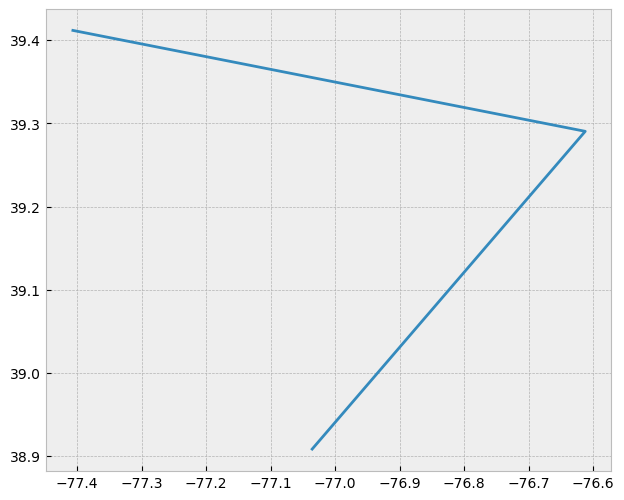

In [3]:
from shapely.geometry import LineString

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)

A polyline is composed of a sequence of two or more coordinate pairs called vertices. A vertex is defined by coordinate pairs, just like a point, but what differentiates a vertex from a point is its explicitly defined relationship with neighboring vertices. A vertex is connected to at least one other vertex.

Like a point, a true line can't be seen since it has no area. And like a point, a line is symbolized using shapes that have a color, width and style (e.g. solid, dashed, dotted, etc...). Roads and rivers are commonly stored as polylines in a GIS.

#### Polygon

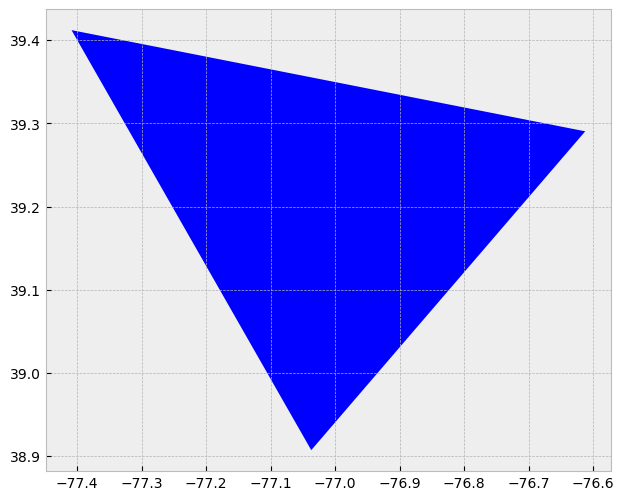

In [4]:
from shapely.geometry import Polygon

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.show()

A polygon is composed of three or more line segments whose starting and ending coordinate pairs are the same. Sometimes you will see the words *lattice* or *area* used in lieu of 'polygon'. Polygons represent both length (i.e. the perimeter of the area) and area. They also embody the idea of an inside and an outside; in fact, the area that a polygon encloses is explicitly defined in a GIS environment. If it isn't, then you are working with a polyline feature. If this does not seem intuitive, think of three connected lines defining a triangle: they can represent three connected road segments (thus polyline features), or they can represent the grassy strip enclosed by the connected roads (in which case an 'inside' is implied thus defining a polygon).

### Raster

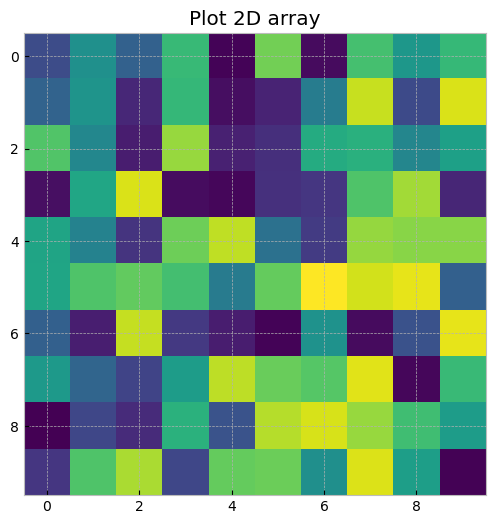

In [5]:
import numpy as np

X=np.random.randint(256, size=(10, 10))

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.show()

A raster data model uses an array of cells, or pixels, to represent real-world objects. Raster datasets are commonly used for representing and managing imagery, surface temperatures, digital elevation models, and numerous other entities.

A raster can be thought of as a special case of an area object where the area is divided into a regular grid of cells. But a regularly spaced array of marked points may be a better analogy since rasters are stored as an array of values where each cell is defined by a single coordinate pair inside of most GIS environments.

Implicit in a raster data model is a value associated with each cell or pixel. This is in contrast to a vector model that may or may not have a value associated with the geometric primitive.

### Object vs. Field

The traditional vector/raster perspective of our world is one that has been driven by software and data storage environments. But this perspective is not particularly helpful if one is interested in analyzing the pattern. In fact, it can mask some important properties of the entity being studied. An object vs. field view of the world proves to be more insightful even though it may seem more abstract.

#### Object View

An object view of the world treats entities as discrete objects; they need not occur at every location within a study area. Point locations of cities would be an example of an object. So would be polygonal representations of urban areas which may be non-contiguous.

#### Field View

A field view of the world treats entities as a scalar field. This is a mathematical concept in which a scalar is a quantity having a magnitude. It is measurable at every location within the study region. Two popular examples of a scalar field are surface elevation and surface temperature. Each represents a property that can be measured at any location. 

Another example of a scalar field is the presence and absence of a building. This is a binary scalar where a value of 0 is assigned to a location devoid of buildings and a value of 1 is assigned to locations having one or more buildings. A field representation of buildings may not seem intuitive, in fact, given the definition of an object view of the world in the last section, it would seem only fitting to view buildings as objects. In fact, buildings can be viewed as both field or objects. The context of the analysis is ultimately what will dictate which view to adopt. If we're interested in studying the distribution of buildings over a study area, then an object view of the features makes sense. If, on the other hand, we are interested in identifying all locations where buildings don't exist, then a binary field view of these entities would make sense.

### Scale

How one chooses to represent a real-world entity will be in large part dictated by the **scale** of the analysis. In a GIS, scale has a specific meaning: it's the ratio of distance on the map to that in the real world. So a **large scale** map implies a relatively large ratio and thus a small extent. This is counter to the layperson's interpretation of *large scale* which focuses on the scope or extent of a study; so a large scale analysis would imply one that covers a *large* area. 

The following two maps represent the same entity: the Boston region. At a small scale (e.g. 1:10,000,000), Boston and other cities may be best represented as points. At a large scale (e.g. 1:34,000), Boston may be best represented as a polygon. Note that at this large scale, roads may also be represented as polygon features instead of polylines.


```{figure} ../_static/img/Boston_small_scale.jpg
:name: Boston small scale
Map of the Boston area at a 1:10,000,000 scale. Note that in geography, this is considered small scale whereas in layperson terms, this extent is often referred to as a large scale (i.e. covering a large area).
```


```{figure} ../_static/img/Boston_large_scale.jpg
:name: Boston large scale
Map of the Boston area at a 1:34,000 scale. Note that in geography, this is considered large scale whereas in layperson terms, this extent is often referred to as a small scale (i.e. covering a small area).
```

### Attribute Tables

Non-spatial information associated with a spatial feature is referred to as an **attribute**. A feature on a GIS map is linked to its record in the attribute table by a unique numerical feature identifier (FID). Every feature in a layer has an identifier. It is important to understand the one-to-one or many-to-one relationship between feature, and attribute record. Because features on the map are linked to their records in the table, many GIS software will allow you to click on a map feature and see its related attributes in the table.  

Raster data can also have attributes only if pixels are represented using a small set of unique integer values. Raster datasets that contain attribute tables typically have cell values that represent or define a class, group, category, or membership. NOTE: not all GIS raster data formats can store attribute information; in fact most raster datasets you will work with in this course will not have attribute tables.

#### Measurement Levels

Attribute data can be broken down into four **measurement levels**:

 * **Nominal** data which have no implied order, size or quantitative information (e.g. paved and unpaved roads) 

 * **Ordinal** data have an implied order (e.g. ranked scores), however, we cannot quantify the difference since a linear scale is not implied.

 * **Interval** data are numeric and have a linear scale, however they do not have a true zero and can therefore not be used to measure *relative* magnitudes. For example, one cannot say that 60&deg;F is twice as warm as 30&deg;F since when presented in degrees &deg;C the temperature values are 15.5&deg;C and -1.1&deg;C respectively (and 15.5 is clearly not twice as big as -1.1). 

 * **Ratio** scale data are interval data with a true zero such as monetary value (e.g. $1, $20, $100).

### Data type

Another way to categorize an attribute is by its **data type**. ArcGIS supports several data types such as **integer, float, double and text**. Knowing your data type and measurement level should dictate how they are stored in a GIS environment. The following table lists popular data types available in most GIS applications.

Type | Stored values                            | Note
-----|------------------------------------------|-----
Short integer | -32,768 to 32,768 | Whole numbers
Long integer | -2,147,483,648 to 2,147,483,648 | Whole numbers
Float | -3.4 * E-38 to 1.2 E38 | Real numbers
Double | -2.2 * E-308 to 1.8 * E308 | Real numbers
Text | Up to 64,000 characters | Letters and words


While whole numbers can be stored as a float or double (i.e. we can store the number 2 as 2.0) doing so comes at a cost: an increase in storage space. This may not be a big deal if the dataset is small, but if it consists of tens of thousands of records the increase in file size and processing time may become an issue.

While storing an integer value as a float may not have dire consequences, the same cannot be said of storing a float as an integer. For example, if your values consist of 0.2, 0.01, 0.34, 0.1 and 0.876, their integer counterpart would be 0, 0, 0, and 1 (i.e. values rounded to the nearest whole number). 
<!-- This can have a significant impact on a map as shown in the following example.

```{r echo=FALSE, fig.cap = "Map of data represented as decimal (float) values.",  fig.height=3}

library(spdep)
library(maptools)
library(RColorBrewer)
fn     <- system.file("etc/shapes/eire.shp", package = "spdep")[1] 
prj    <- CRS("+proj=utm +zone=30 +units=km") 
eire   <- readShapeSpatial(fn, ID = "names", proj4string = prj) 
eire$x <- log(eire$INCOME) / max(log(eire$INCOME)) 
brks   <- seq(0.5,1.0, .1) 
brks[6] <- 1.00001 
clr     <- brewer.pal(5,"Greens")
l1 <- list(sp.text, coordinates(eire), as.character(round(eire$x,2)), cex=0.5 ) 
spplot(eire, z="x", at= brks, col.regions =clr, col="white", sp.layout=l1)

```


```{r echo=FALSE, fig.cap = "Map of same data represented as integers instead of float.", fig.height=3}
eire$x.int <- round(eire$x) 
l2 <- list(sp.text, coordinates(eire), as.character(round(eire$x.int,2)), cex=0.5 ) 
spplot(eire, z="x.int", at= brks, col.regions =clr, col="white", sp.layout=l2)

```  -->